In [33]:
from Handler.SequenceAnalysisHandler import SequenceAnalysisHandler
from Handler import utils
from Handler.OcclusionHandler import OcclusionHandler
import matplotlib.pyplot as plt

reverse = False
plt.rcParams.update({'font.size': 10})

### Efficiency Analysis

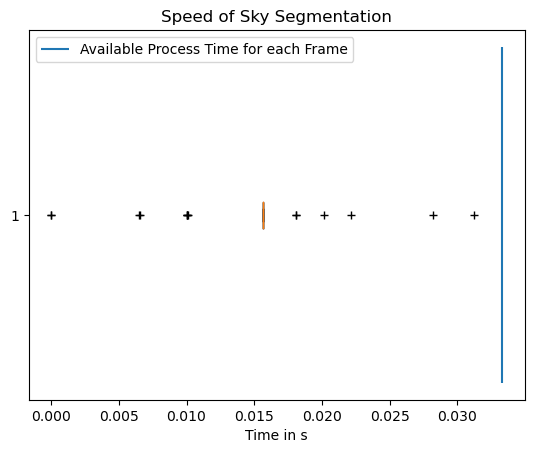

In [34]:
from matplotlib import pyplot as plt

data = [.020147085189819336, .018084287643432617, .01563286781311035, .015633106231689453, .015630722045898438, .015624284744262695, .01562952995300293, .01562952995300293, .015630245208740234, .015629291534423828, .015634536743164062, 0.0, .01808023452758789, .015629291534423828, .015630245208740234, .015627145767211914, .015624284744262695, .015625715255737305, .015629291534423828, .015635967254638672, .015633583068847656, .01562809944152832, .01003575325012207, .015628814697265625, .028171062469482422, .015630722045898438, .015629053115844727, .010053873062133789, .015633821487426758, .010050535202026367, .015630006790161133, .015628576278686523, .015634536743164062, .022140026092529297, .015626192092895508, .015631914138793945 , .006528615951538086, .01563572883605957, .015628337860107422, .010091066360473633, .015628576278686523, .015630006790161133, .01562809944152832, .03125929832458496, .015627145767211914, .015630483627319336, .006513357162475586, 0.0, .015625953674316406]

plt.subplots(figsize=(6.4, 4.8))
plt.title("Speed of Sky Segmentation")
plt.xlabel("Time in s")
plt.boxplot(data, vert=False, sym='+')
plt.vlines(x=0.0333, ymin=0, ymax=2, label="Available Process Time for each Frame")
plt.legend(loc='upper left')
plt.show()

In [35]:
plt.rcParams.update({'font.size': 18})

### Paulusstraße

In [36]:
handler = OcclusionHandler(path_prefix="./FullPaulustr/", model=None)
seq = SequenceAnalysisHandler(handler)
evaluator_paul = seq.analyze_sky_segmentation_sequence(reverse)

100%|██████████| 7/7 [00:02<00:00,  3.42it/s]


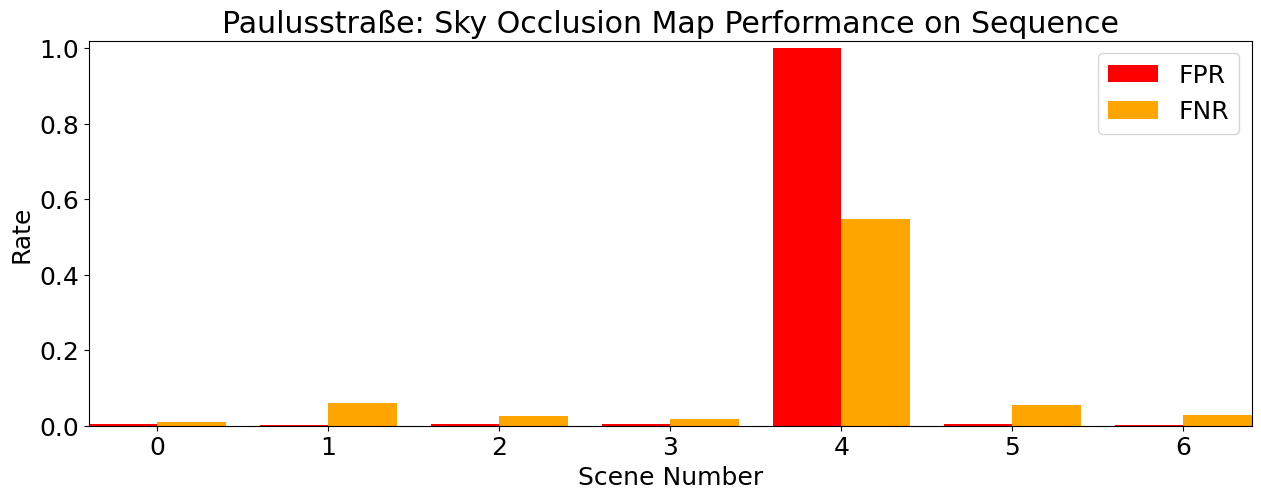

In [37]:
evaluator_paul.plot_fprs_and_fnrs("Paulusstraße: Sky Occlusion Map Performance on Sequence")

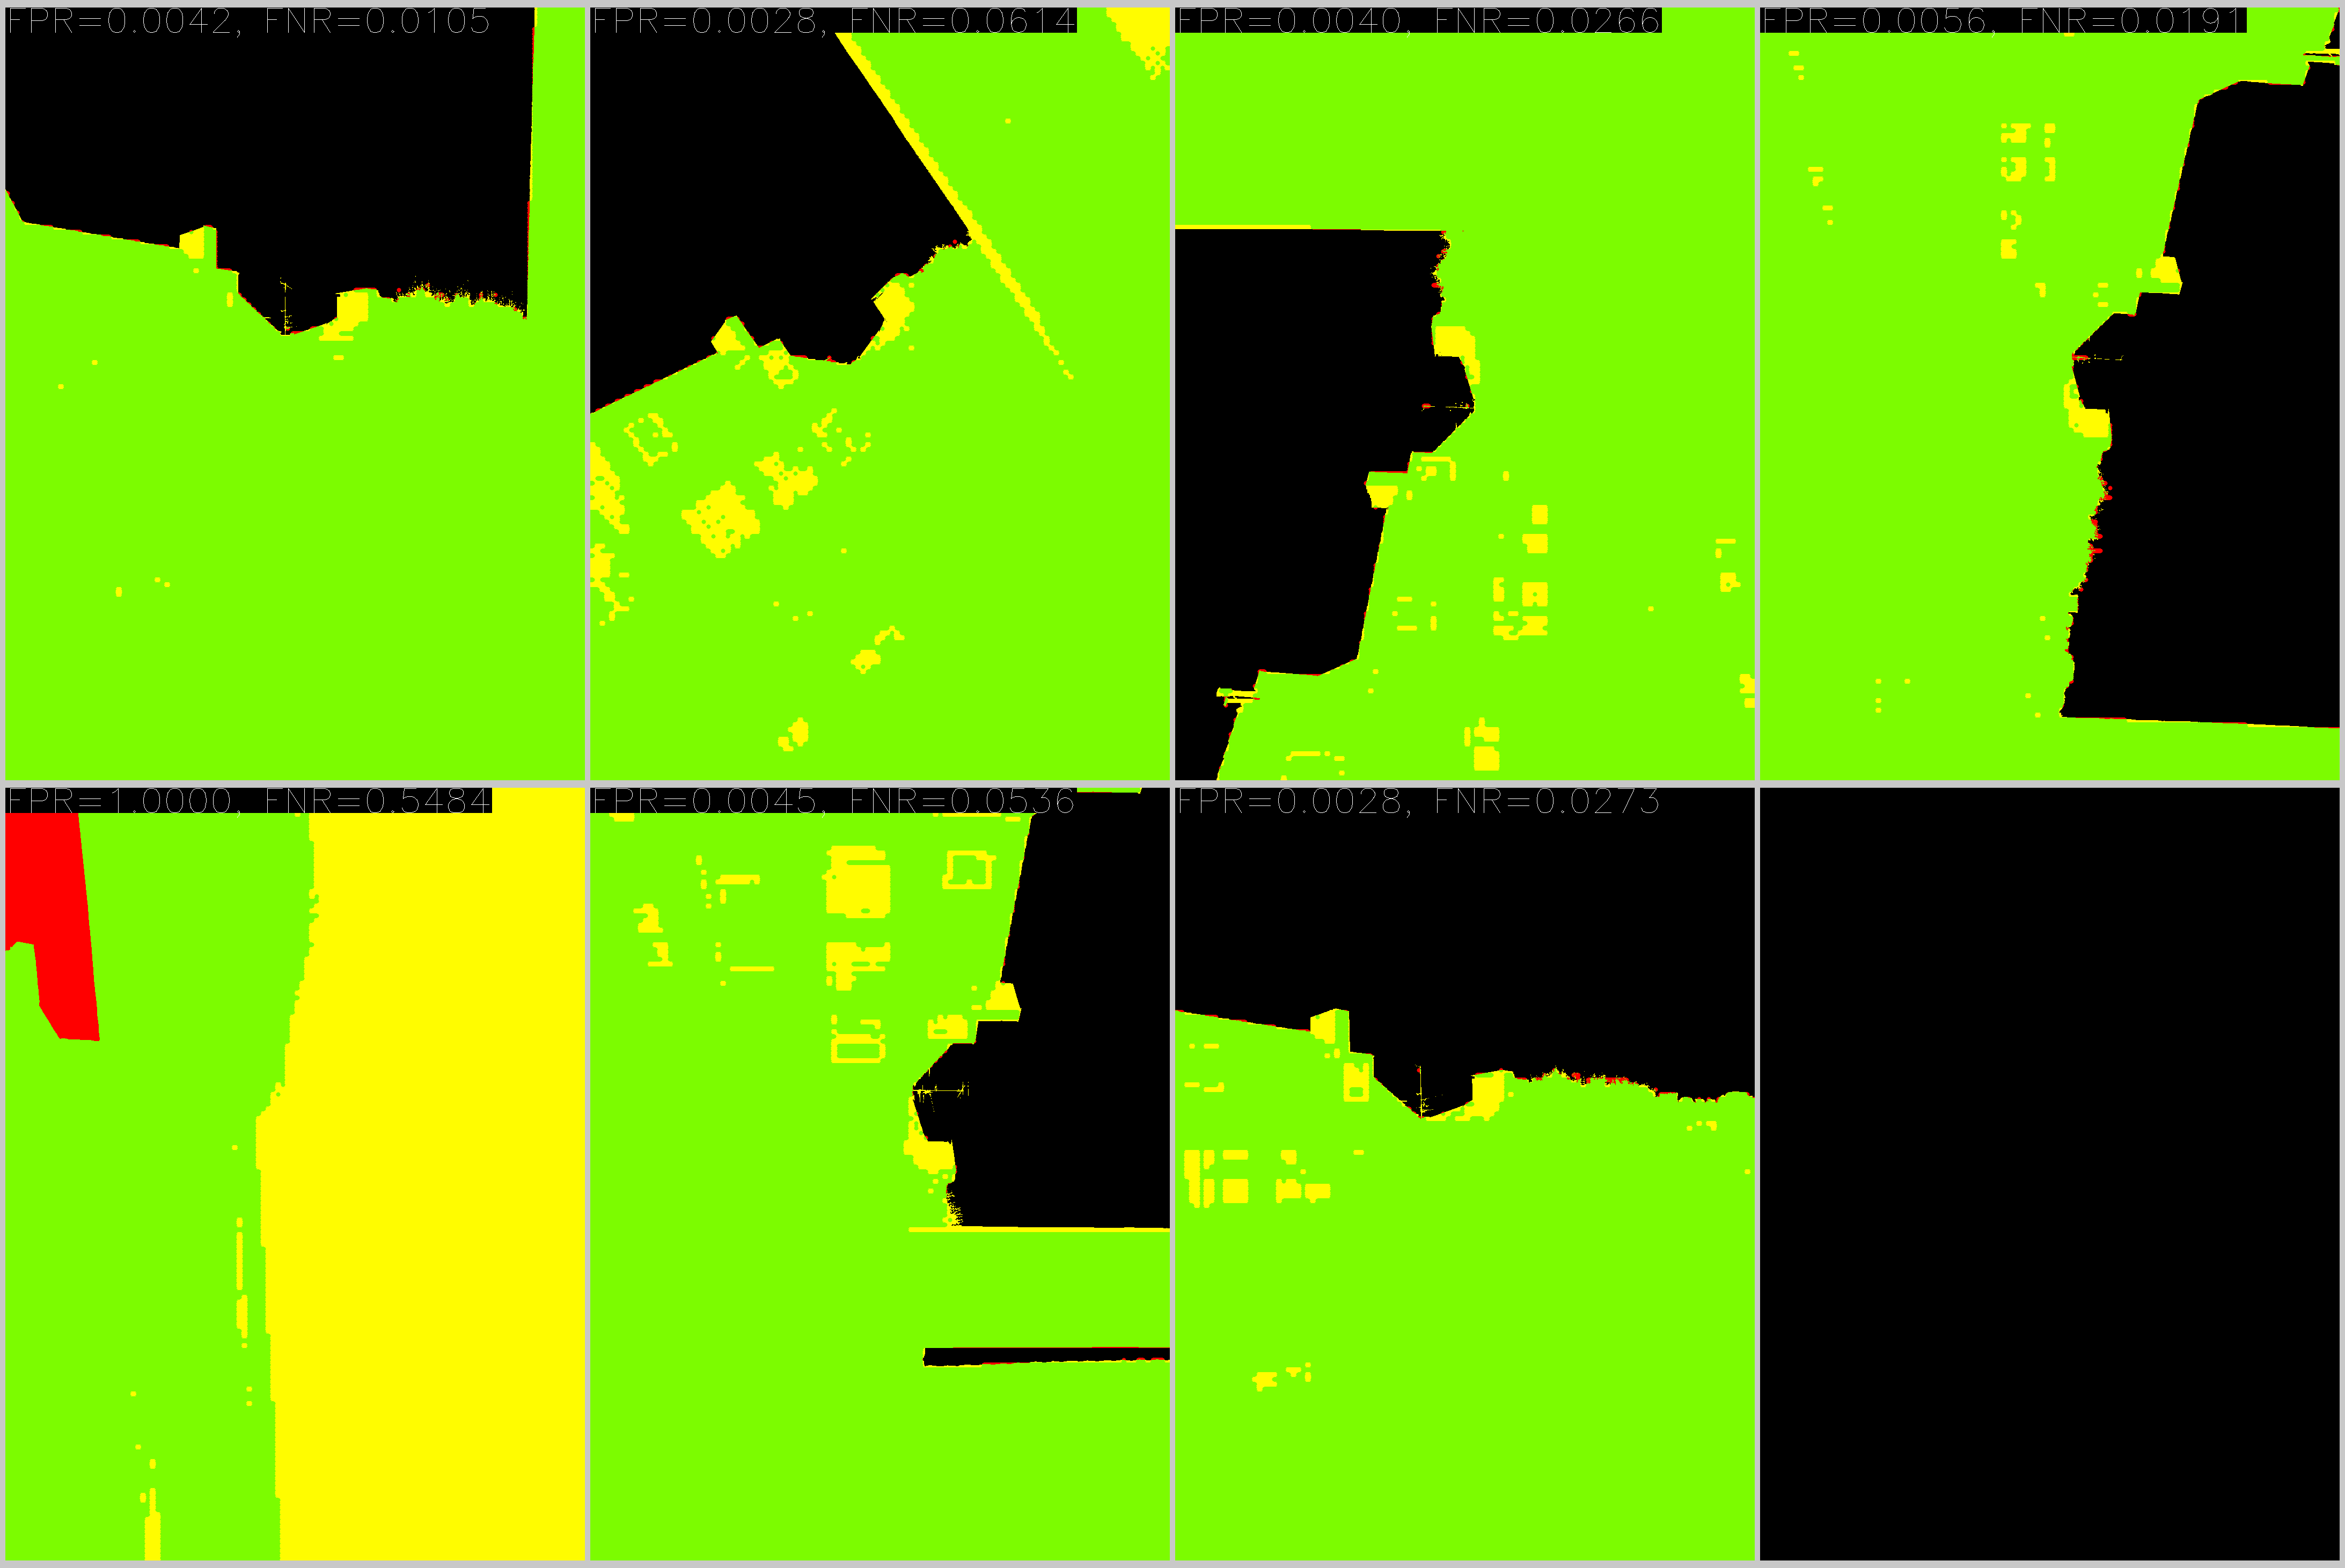

In [38]:
utils.visualize_image(evaluator_paul.visualize_images(n_cols=4))

### Informatikzentrum

In [39]:
handler = OcclusionHandler(path_prefix="./InformatikZentrum/", model=None)
seq = SequenceAnalysisHandler(handler)
evaluator_info = seq.analyze_sky_segmentation_sequence(reverse)

100%|██████████| 29/29 [00:08<00:00,  3.35it/s]


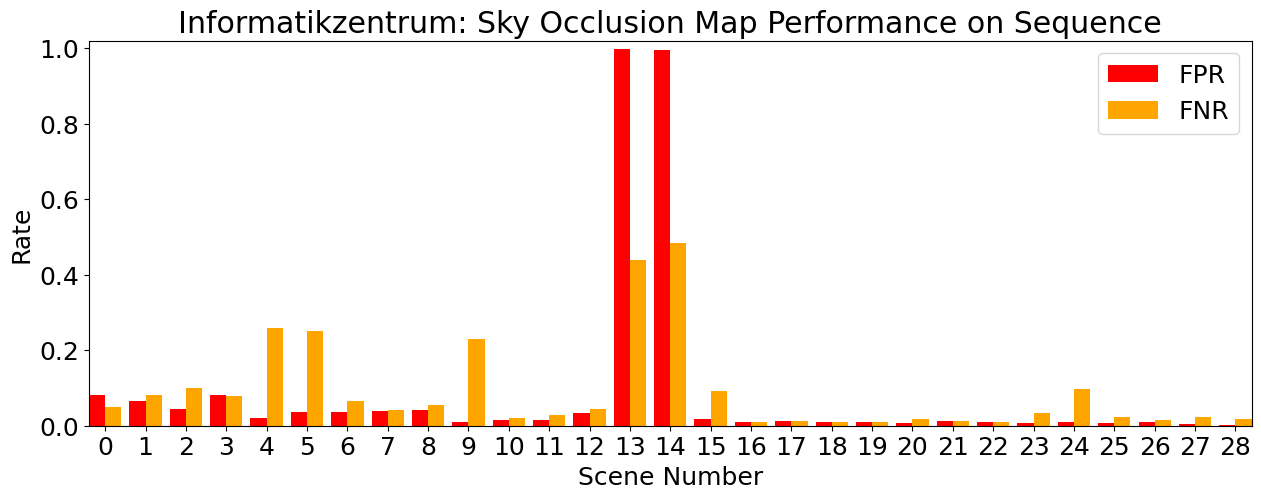

In [40]:
evaluator_info.plot_fprs_and_fnrs("Informatikzentrum: Sky Occlusion Map Performance on Sequence")

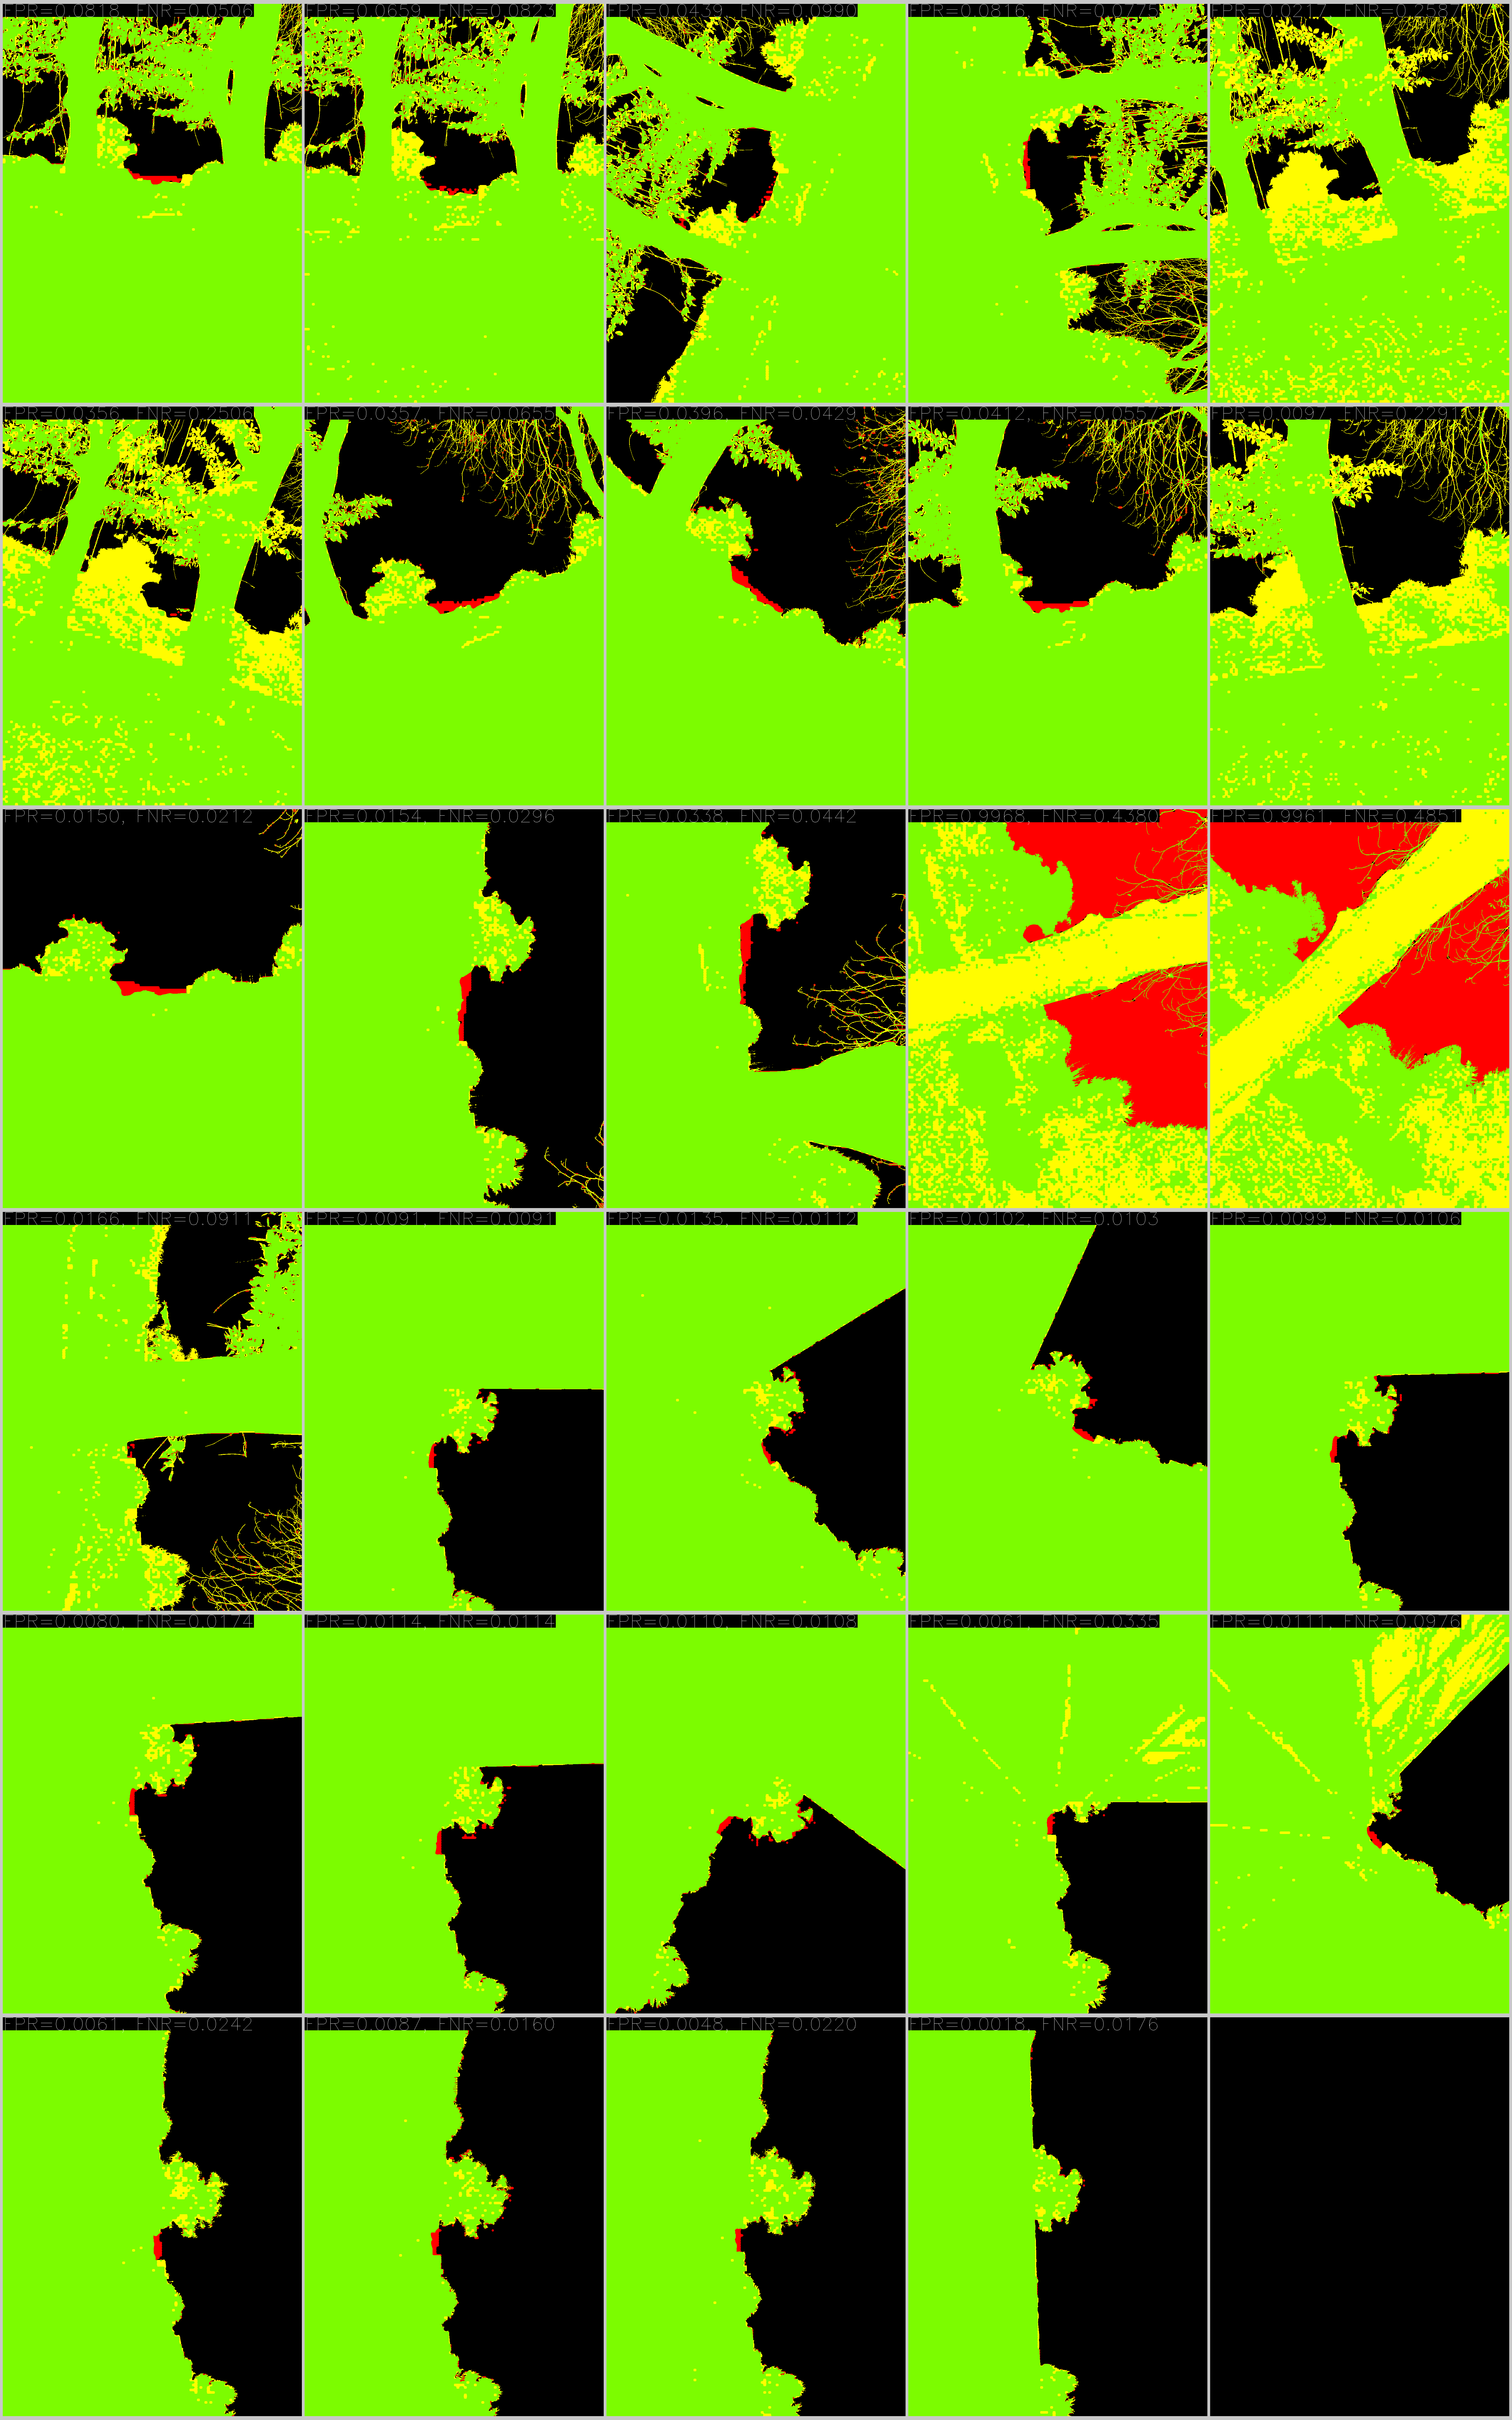

In [41]:
utils.visualize_image(evaluator_info.visualize_images(n_cols=5))

### Königshügel

In [42]:
handler = OcclusionHandler(path_prefix="./Koenigshuegel/", model=None)
seq = SequenceAnalysisHandler(handler)
evaluator_koen = seq.analyze_sky_segmentation_sequence(reverse)

100%|██████████| 13/13 [00:04<00:00,  3.11it/s]


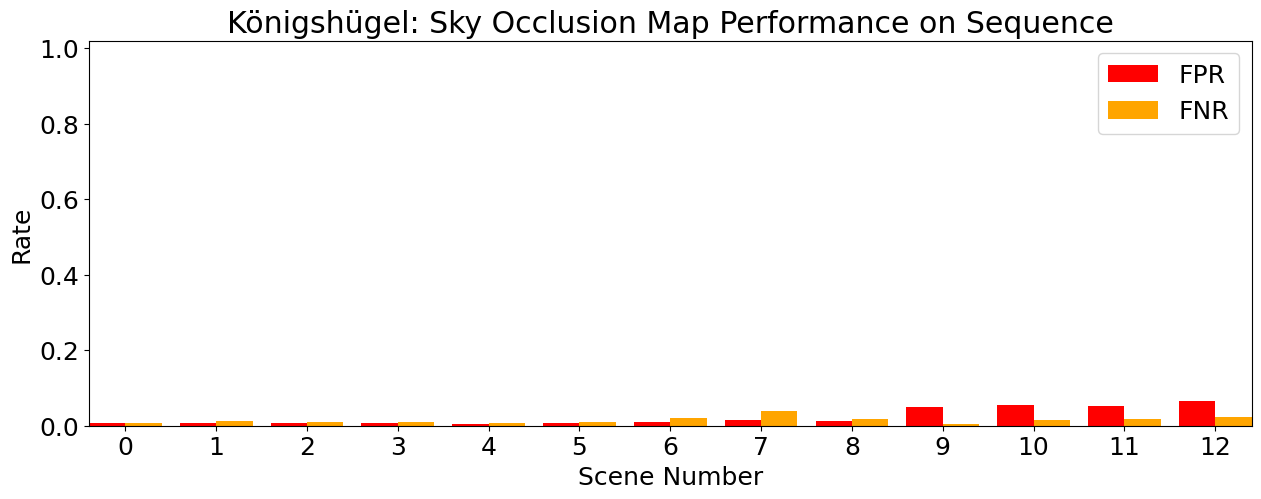

In [43]:
evaluator_koen.plot_fprs_and_fnrs("Königshügel: Sky Occlusion Map Performance on Sequence")

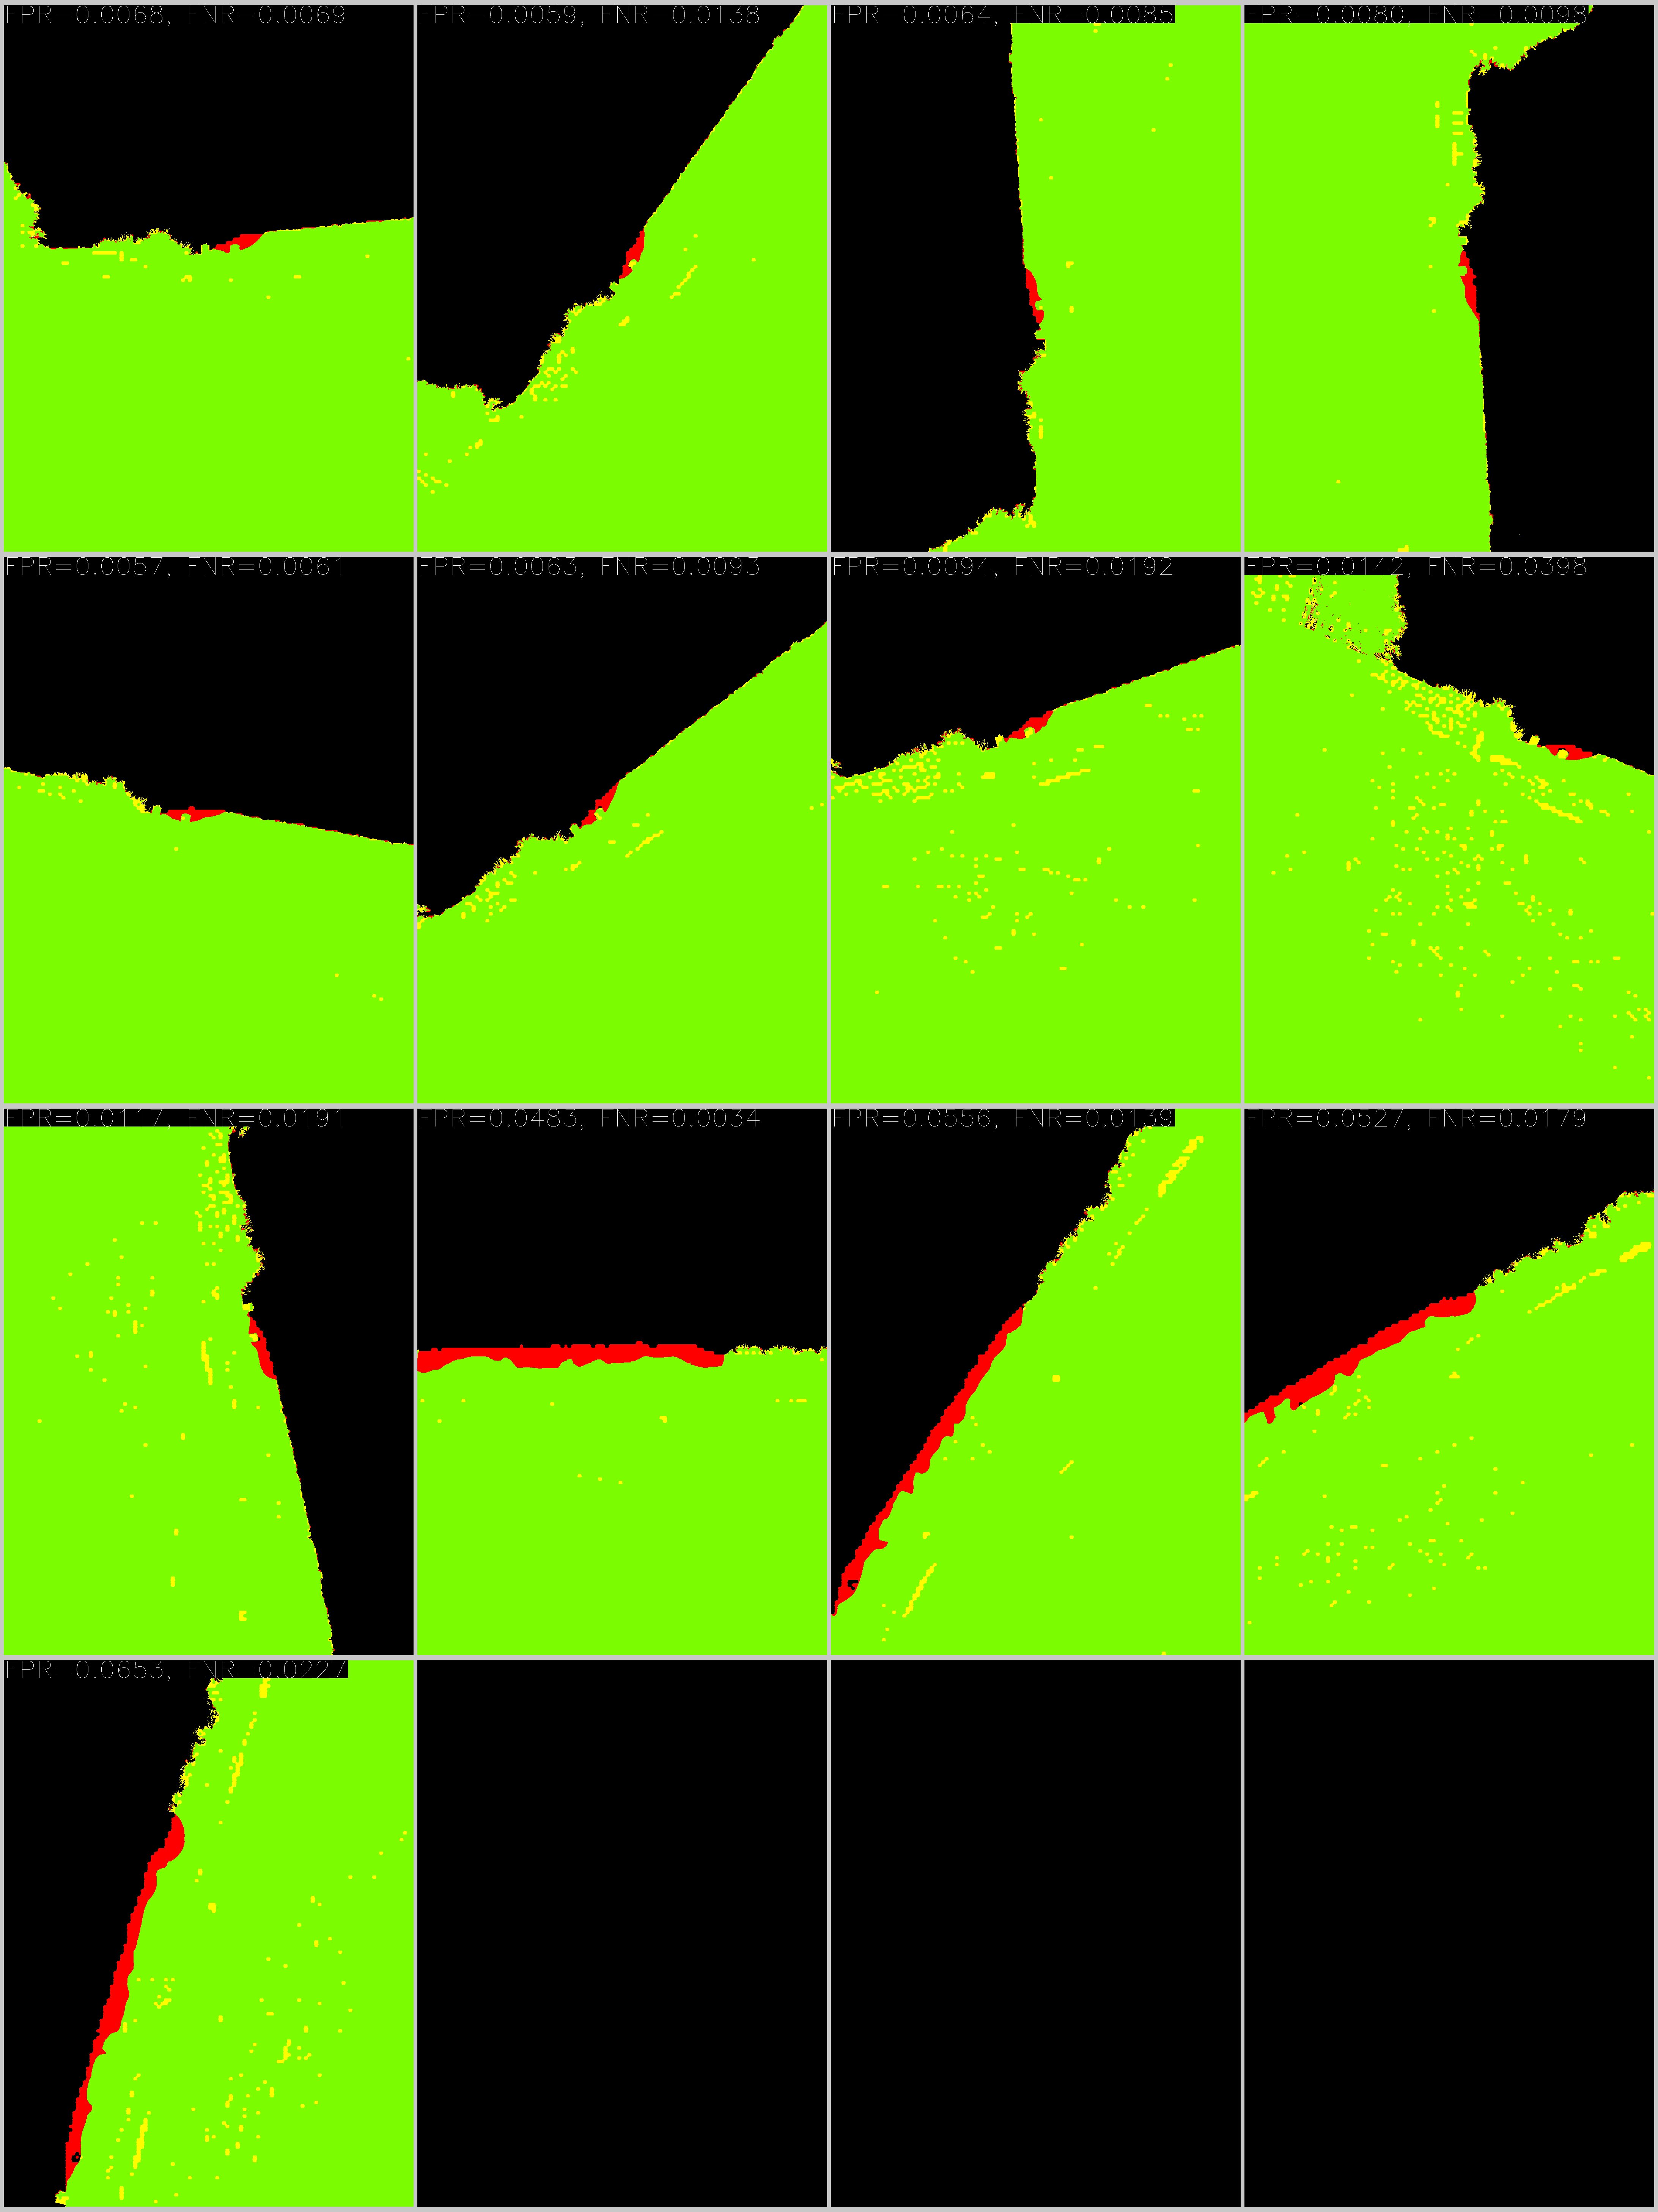

In [44]:
utils.visualize_image(evaluator_koen.visualize_images(n_cols=4))

### Luisberg

In [45]:
from Handler.SequenceAnalysisHandler import SequenceAnalysisHandler
from Handler import utils
from Handler.OcclusionHandler import OcclusionHandler

In [46]:
handler = OcclusionHandler(path_prefix="./Lousberg/", model=None)
seq = SequenceAnalysisHandler(handler, 0,11)
evaluator_luis = seq.analyze_sky_segmentation_sequence(reverse=False)

100%|██████████| 12/12 [00:04<00:00,  2.94it/s]


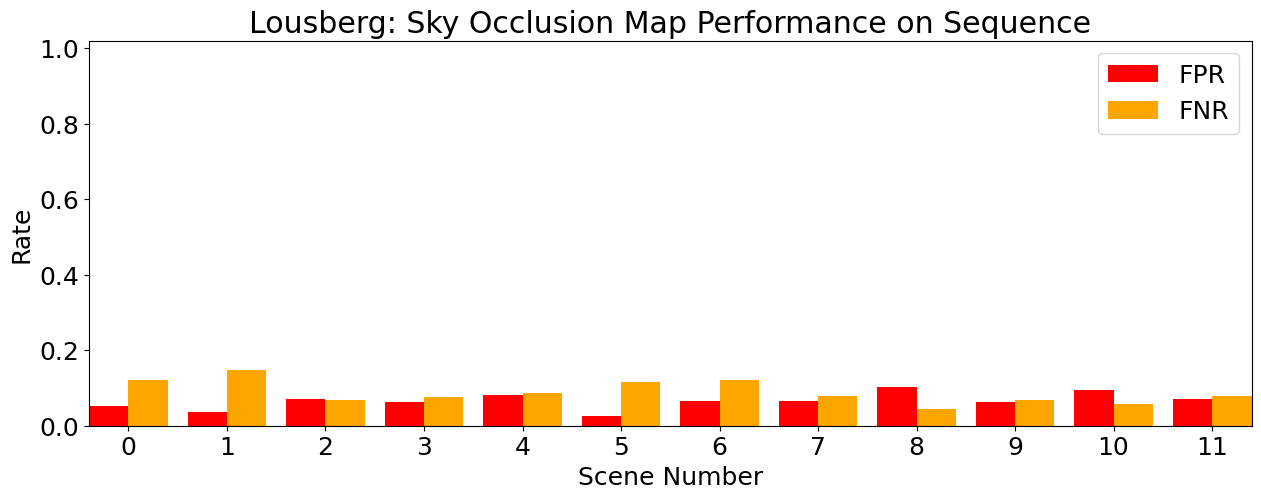

In [47]:
evaluator_luis.plot_fprs_and_fnrs("Lousberg: Sky Occlusion Map Performance on Sequence")

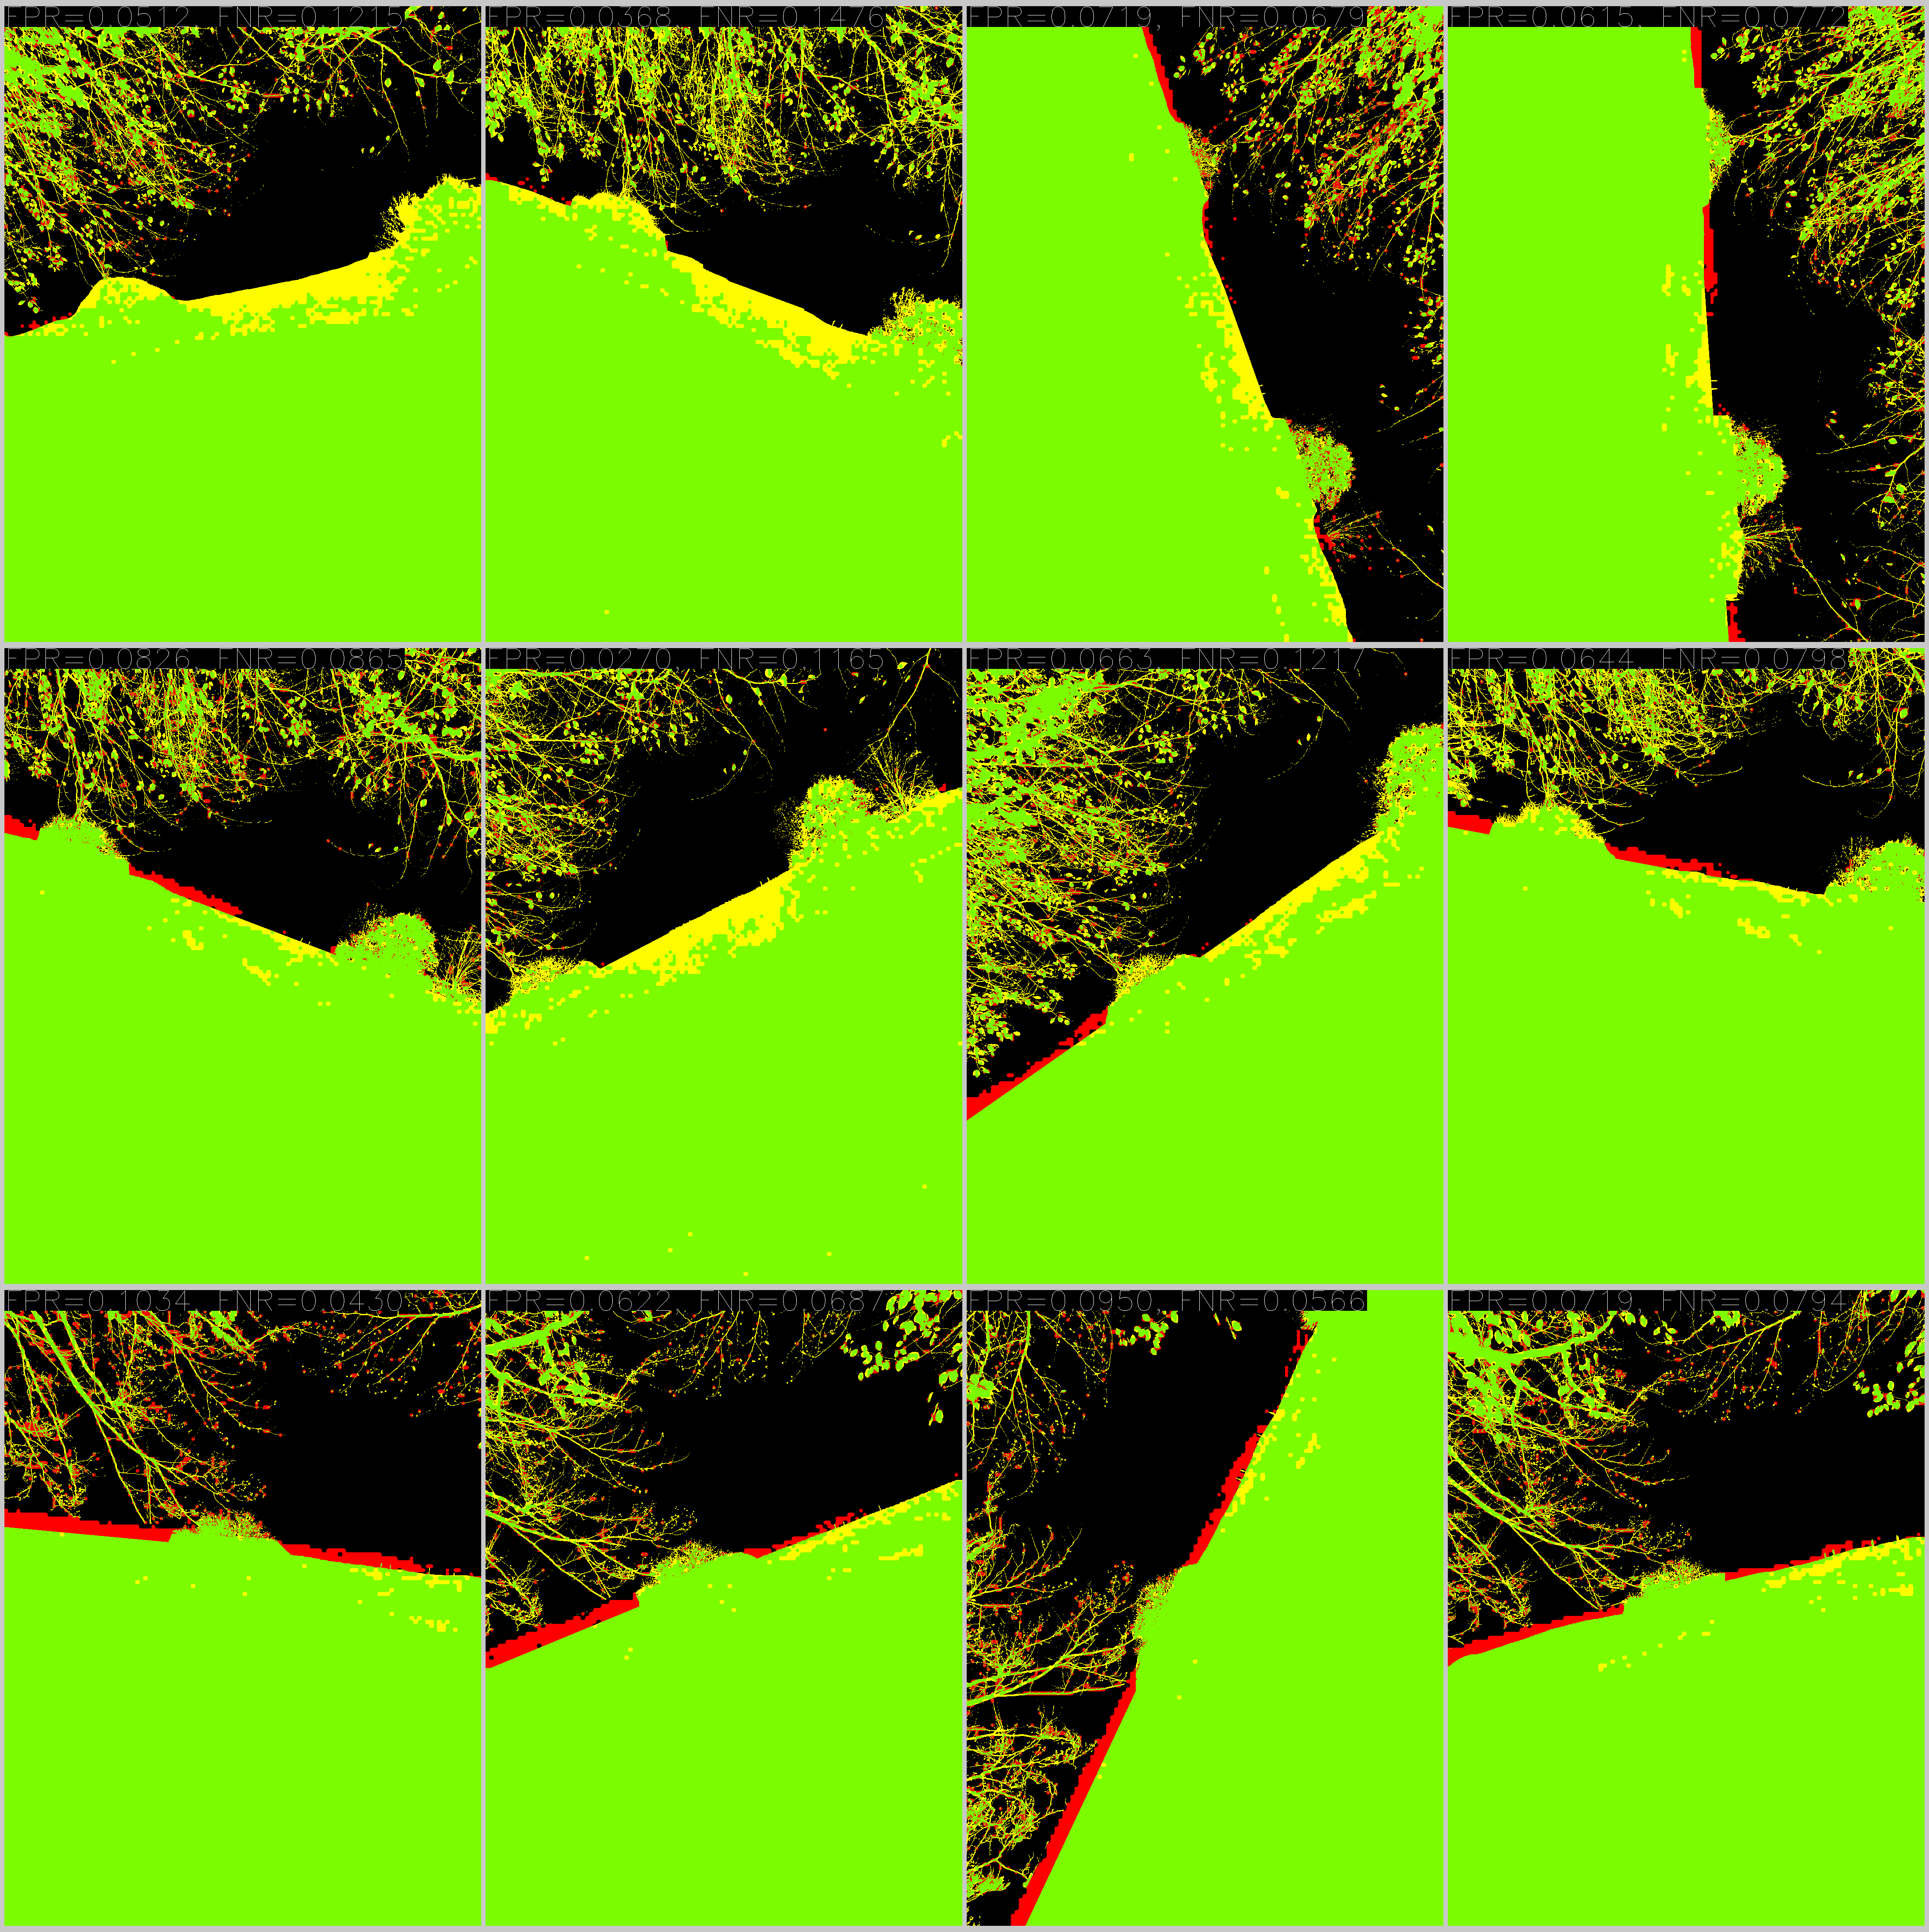

In [48]:
utils.visualize_image(evaluator_luis.visualize_images(n_cols=4))

# Cutout Evaluation

In [49]:
from Handler.SequenceAnalysisHandler import SequenceAnalysisHandler
from Handler.OcclusionHandler import OcclusionHandler

In [50]:
handler = OcclusionHandler(path_prefix="./FullPaulustr/", model=None)
seq = SequenceAnalysisHandler(handler)
sfm_sky_evaluator_paul = seq.analyze_sky_cutout_occlusion_sequence()

100%|██████████| 7/7 [00:01<00:00,  3.64it/s]


In [51]:
handler = OcclusionHandler(path_prefix="./InformatikZentrum/", model=None)
seq = SequenceAnalysisHandler(handler)
sfm_sky_evaluator_inf = seq.analyze_sky_cutout_occlusion_sequence()

100%|██████████| 29/29 [00:07<00:00,  3.66it/s]


In [52]:
handler = OcclusionHandler(path_prefix="./Koenigshuegel/", model=None)
seq = SequenceAnalysisHandler(handler)
sfm_sky_evaluator_koen = seq.analyze_sky_cutout_occlusion_sequence()

100%|██████████| 13/13 [00:03<00:00,  3.48it/s]


In [53]:
handler = OcclusionHandler(path_prefix="./Lousberg/", model=None)
seq = SequenceAnalysisHandler(handler, 0, 11)
sfm_sky_evaluator_lous = seq.analyze_sky_cutout_occlusion_sequence()

100%|██████████| 12/12 [00:03<00:00,  3.20it/s]


In [54]:
import numpy as np

rates = [[], []]
for eval in [sfm_sky_evaluator_paul, sfm_sky_evaluator_inf, sfm_sky_evaluator_koen, sfm_sky_evaluator_lous]:
    rates[0].extend(eval.fprs)
    rates[1].extend(eval.fnrs)
print(f'FPR mean: {np.mean(rates[0])}, FNR mean: {np.mean(rates[1])}')

FPR mean: 0.08870047046141513, FNR mean: 0.22814919081555513
